## EIT SECTION

A l'aide de la bibliothèque pyEIT on créer artificiellement des contacts (des anomalies). On récupère ainsi les matrice de tension généré par ces anomalies.

In [2]:
pip install pyEIT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.0/691.0 kB 13.6 MB/s eta 0:00:00
  Created wheel for pyEIT: filename=pyeit-1.2.4-py2.py3-none-any.whl size=93839 sha256=dbfc984bfdadc26d14e059dd40c4379195a9e145ad8f0933309ee1422a2484fa
  Stored in directory: /root/.cache/pip/wheels/b9/de/99/2c8c178735e849be6eb4fba06fc90c5dc968586f9e5d0604d9
Successfully built pyEIT


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pyeit.eit.bp as bp
import pyeit.eit.protocol as protocol
import pyeit.mesh as mesh
from pyeit.eit.fem import EITForward
from pyeit.mesh.wrapper import PyEITAnomaly_Circle

def generate_voltage_matrix(anomaly_center, anomaly_radius, anomaly_perm):
    """Function to generate voltage matrix with varying anomaly."""
    # 0. Build mesh
    n_el = 16  # Number of electrodes
    mesh_obj = mesh.create(n_el, h0=0.1)

    # 1. Problem setup
    anomaly = PyEITAnomaly_Circle(center=anomaly_center, r=anomaly_radius, perm=anomaly_perm)
    mesh_new = mesh.set_perm(mesh_obj, anomaly=anomaly, background=1.0)

    # 2. FEM forward simulations
    protocol_obj = protocol.create(n_el, dist_exc=1, step_meas=1, parser_meas="std")
    fwd = EITForward(mesh_obj, protocol_obj)
    v0 = fwd.solve_eit()
    v1 = fwd.solve_eit(perm=mesh_new.perm)

    # 3. Naive inverse solver using back-projection
    eit = bp.BP(mesh_obj, protocol_obj)
    eit.setup(weight="none")
    ds = 192.0 * eit.solve(v1, v0, normalize=True)

    return ds, mesh_obj, mesh_new, mesh_obj.node, mesh_obj.element

In [4]:
# Example usage:
anomaly_center = [-0.2, 0.2]
anomaly_radius = 0.1
anomaly_perm = 10.0

voltage_matrix, mesh_obj, mesh_new, pts, tri = generate_voltage_matrix(anomaly_center, anomaly_radius, anomaly_perm)

voltagemat = generate_voltage_matrix([0.3,0.4], anomaly_radius, anomaly_perm)[0]


In [5]:
def display_single_voltage_matrix(voltage_matrix, figsize=(8, 6)):
    """Display a single voltage matrix with original and reconstructed conductivity distributions."""
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    fig.subplots_adjust(wspace=0.4)

    # Plot original conductivity distribution
    ax0 = axes[0]
    ax0.axis('equal')
    ax0.set_title("Original Conductivity Distribution")
    delta_perm = np.real(mesh_new.perm - mesh_obj.perm)
    im0 = ax0.tripcolor(pts[:, 0], pts[:, 1], tri, delta_perm, shading="flat", cmap='coolwarm')
    fig.colorbar(im0, ax=ax0, orientation='vertical')

    # Plot reconstructed conductivity distribution
    ax1 = axes[1]
    ax1.axis('equal')
    ax1.set_title("Reconstructed Conductivity Distribution")
    im1 = ax1.tripcolor(pts[:, 0], pts[:, 1], tri, voltage_matrix, shading="flat", cmap='inferno')
    fig.colorbar(im1, ax=ax1, orientation='vertical')

    plt.tight_layout()
    plt.show()

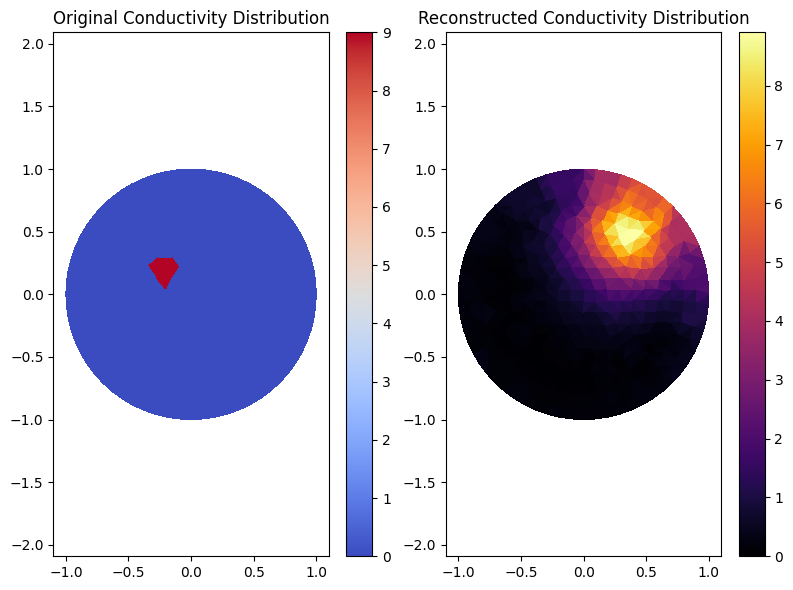

In [6]:
display_single_voltage_matrix(voltagemat)

# Création du dataset :

In [ ]:
import random

# Define fixed anomaly radius and permittivity
anomaly_radius = 0.1
anomaly_perm = 10.0

# Define the range for random anomaly centers
x_range = (-0.5, 0.5)
y_range = (-0.5, 0.5)

# Number of random samples
num_samples = 1000

# Create an empty list to store dataset entries
dataset = []

# Generate random anomaly centers and create dataset
for _ in range(num_samples):
    center = [random.uniform(x_range[0], x_range[1]), random.uniform(y_range[0], y_range[1])]
    ds, mesh_obj, mesh_new, pts, tri = generate_voltage_matrix(center, anomaly_radius, anomaly_perm)
    dataset.append((center, anomaly_radius, anomaly_perm, ds, mesh_obj, mesh_new, pts, tri))

In [ ]:
print(dataset[999][5])

PyEITMesh(node=array([[-1.        ,  0.        ,  0.        ],
       [-0.92387953,  0.38268343,  0.        ],
       [-0.70710678,  0.70710678,  0.        ],
       ...,
       [-0.10184426,  0.99480035,  0.        ],
       [ 0.09824692,  0.99516209,  0.        ],
       [ 0.19690744,  0.98042209,  0.        ]]), element=array([[318, 336, 335],
       [155, 154, 134],
       [153, 152, 133],
       ...,
       [215, 196, 216],
       [196, 195, 175],
       [176, 196, 175]], dtype=int32), perm=array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 

#Exportation du Dataset
Exportation du Dataset en un fichier.pkl pour conserver le format des variables de type pyeit

In [ ]:
import pickle


# Define the file path for saving the data
file_path = 'Dataset_EIT.pkl'

# Save the data to a Pickle file
with open(file_path, 'wb') as file:
    pickle.dump(dataset, file)

print("Data exported to", file_path)


Data exported to Dataset_EIT.pkl


#Importation du Dataset

In [9]:
import pickle

# Define the file path for loading the dataset
file_path = 'Dataset_EIT.pkl'

# Load the dataset from the Pickle file
with open(file_path, 'rb') as file:
    loaded_dataset = pickle.load(file)

print("Dataset loaded successfully from", file_path)

reconstructed_dataset = []

for entry in loaded_dataset:
    center = entry[0]
    anomaly_radius = entry[1]
    anomaly_perm = entry[2]
    ds = entry[3]
    mesh_obj = entry[4]
    mesh_new = entry[5]
    pts = entry[6]
    tri = entry[7]

    # Append the reconstructed entry to the dataset
    reconstructed_dataset.append((center, anomaly_radius, anomaly_perm, ds, mesh_obj, mesh_new, pts, tri))

print("Dataset restored to its original form")


Dataset loaded successfully from Dataset_EIT.pkl
Dataset restored to its original form


In [10]:
reconstructed_dataset[3]

([0.10562118300538992, -0.4287248639787159],
 0.1,
 10.0,
 array([ 3.92764880e-01,  2.33190311e-01,  1.67961049e-01,  1.42816780e-01,
         1.39914324e-01,  1.55992380e-01,  1.97291669e-01,  2.85320628e-01,
         4.80698394e-01,  9.83247707e-01,  2.01167713e+00,  2.86026792e+00,
         4.17033417e+00,  3.11911477e+00,  1.55985385e+00,  7.77622910e-01,
         3.11911477e+00,  4.17033417e+00,  3.11911477e+00,  3.29263111e+00,
         3.11911477e+00,  4.17033417e+00,  4.46393935e+00,  4.17033417e+00,
         1.65935855e+00,  1.55985385e+00,  3.10922940e+00,  2.89441618e+00,
         3.53870237e+00,  4.66333854e+00,  4.46393935e+00,  4.17033417e+00,
         5.56833733e+00,  2.86026792e+00,  3.03806362e+00,  1.55985385e+00,
         1.55985385e+00,  1.65935855e+00,  1.55985385e+00,  3.38458897e+00,
         3.15663824e+00,  3.53870237e+00,  4.58003642e+00,  4.56000334e+00,
         5.29475431e+00,  2.86026792e+00,  3.07943140e+00,  2.86026792e+00,
         2.86026792e+00,  7.77

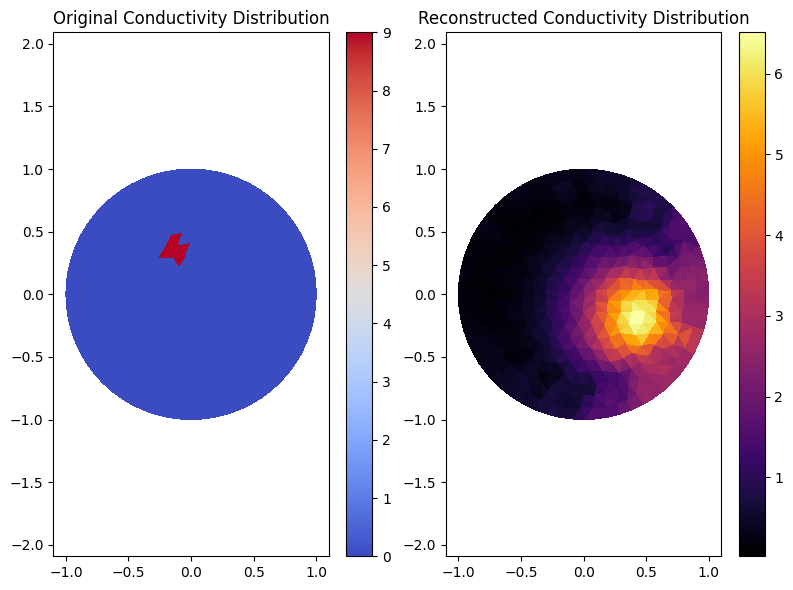

In [11]:
# Example usage:
# Displaying the first entry in the dataset
first_entry = reconstructed_dataset[8]
display_single_voltage_matrix(first_entry[3])


# Transfert à la matrice kohonen

On "applati" les matrices de voltages afin qu'elle soit dans un format adéquat pour le kohonen

In [12]:
def flatten_voltage_matrices(dataset):
    """Flatten the voltage matrices in the dataset."""
    flattened_dataset = []
    for entry in dataset:
        # Extract the voltage matrix from the dataset entry
        ds = entry[3]
        # Flatten the voltage matrix and append to the flattened dataset
        flattened_dataset.append(ds.flatten())
        data = np.array(flattened_dataset)
    return data

In [13]:
# Example usage:
data = flatten_voltage_matrices(reconstructed_dataset)
print(data[1])  # Print the flattened voltage matrix of the first entry in the dataset

[0.57269565 0.55614518 0.52663156 0.49845736 0.49930777 0.56957689
 0.72156372 0.90428756 1.03957039 1.05850077 0.96411076 0.89896909
 0.83343763 0.7154834  0.61910507 0.57915173 0.7154834  0.83343763
 0.7154834  0.91050184 0.7154834  0.83343763 0.94713815 0.83343763
 0.86984469 0.61910507 0.54781143 0.56306291 0.53413558 0.96712422
 0.94713815 0.83343763 1.05651326 0.89896909 1.11441704 0.61910507
 0.61910507 0.86984469 0.61910507 0.65887214 0.68305343 0.53413558
 0.48441784 1.02645736 0.74947468 0.89896909 1.09104319 0.89896909
 0.89896909 0.57915173 0.78160808 0.46403004 0.86774237 0.29901261
 0.39905415 0.58121377 0.67586915 0.53096738 0.54076285 0.54285736
 1.09104319 0.5418384  1.1098763  0.96411076 0.74296521 0.57915173
 0.79241377 0.29387297 0.56290138 0.54180757 0.64708924 1.03418217
 1.10861564 0.92333898 0.95473257 0.70468631 0.64243783 1.32207527
 0.96411076 1.1910287  0.57915173 0.83859472 0.42673124 0.36035411
 0.72129549 0.92291212 1.10397684 1.14395074 1.49463423 1.3714

In [14]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=6cace38e07b37b5e4ecad236b7ed09f680fa5ad6cb6e4d52ce545f0bc4cdfa5a
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


Séparation du Dataset en échantillon pour l'entrainement, la validation et le test

In [22]:
from sklearn.model_selection import train_test_split
from minisom import MiniSom

anomaly_centers = np.array([entry[0] for entry in reconstructed_dataset])

# Split the dataset into training, testing, and validation sets
# First, split into training and temp sets
train_data, temp_data, train_centers, temp_centers = train_test_split(data, anomaly_centers, test_size=0.3, random_state=42)

# Then, split the temp set into testing and validation sets
test_data, val_data, test_centers, val_centers = train_test_split(temp_data, temp_centers, test_size=0.5, random_state=42)


# Training

In [ ]:
# Initialization and training
n_neurons = 16
m_neurons = 13
som = MiniSom(n_neurons, m_neurons, train_data.shape[1], sigma=1.5, learning_rate=1,
              neighborhood_function='gaussian', random_seed=0, topology='rectangular')

som.pca_weights_init(train_data)
som.train(train_data, 10000, verbose=True)  # random training

/usr/local/lib/python3.10/dist-packages/minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 3.8192276667700416


In [ ]:
som.topographic_error(train_data[:850])

0.007142857142857143

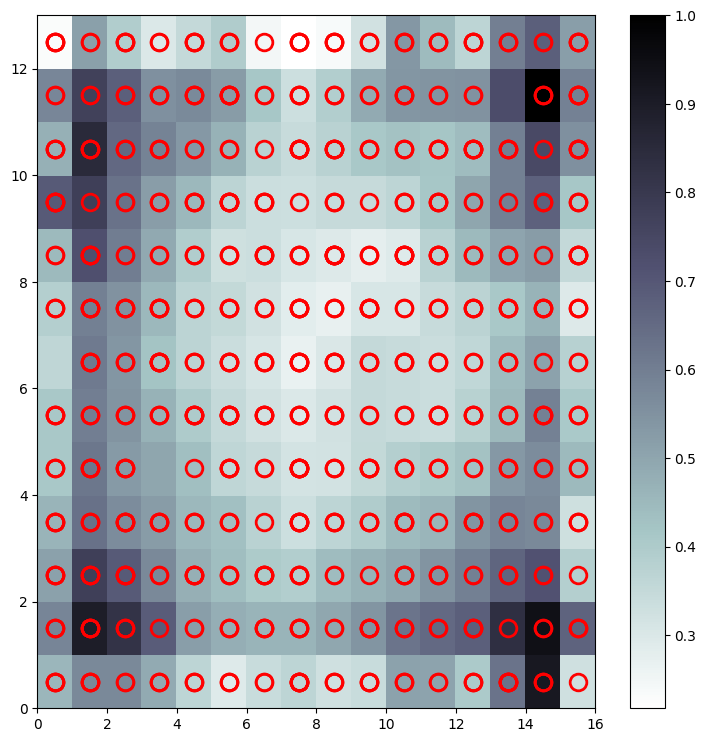

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as background
plt.colorbar()

# Plot the response for each pattern in the dataset
for entry in train_data:
    w = som.winner(entry)  # Get the winner neuron
    # Place a marker on the winning position for the sample entry
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', markeredgecolor='r', markersize=12, markeredgewidth=2)

plt.show()

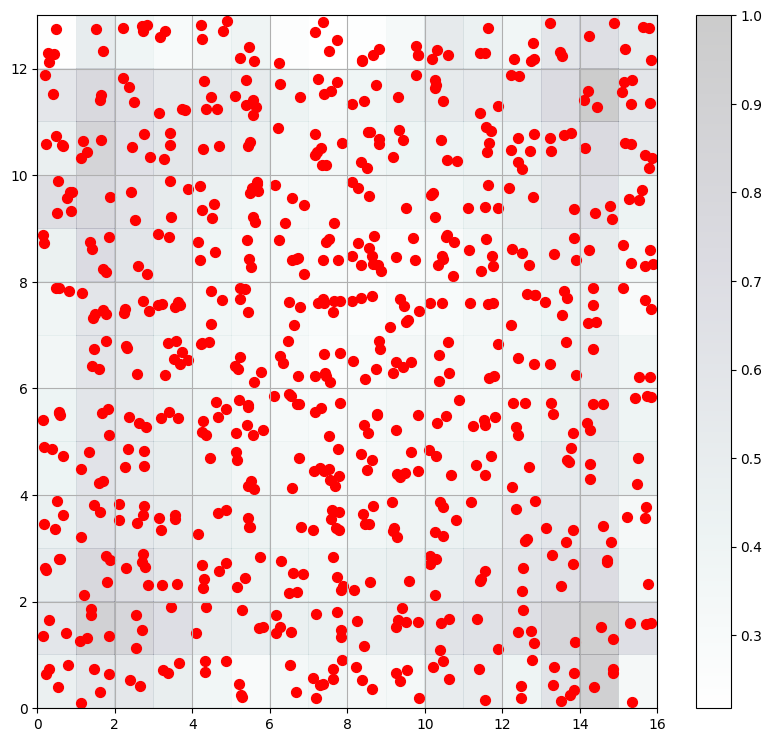

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in train_data])
w_x = np.array(w_x)
w_y = np.array(w_y)


plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.2)
plt.colorbar()

# Plot the positions of winning neurons based on target labels
for c in range(len(train_data)):
    center = train_data[c][0]  # Anomaly center
    plt.scatter(w_x[c] + 0.5 + (np.random.rand() - 0.5) * 0.8,
                w_y[c] + 0.5 + (np.random.rand() - 0.5) * 0.8,
                s=50, c='r', label=f'Anomaly at {center}')

plt.grid()
plt.show()


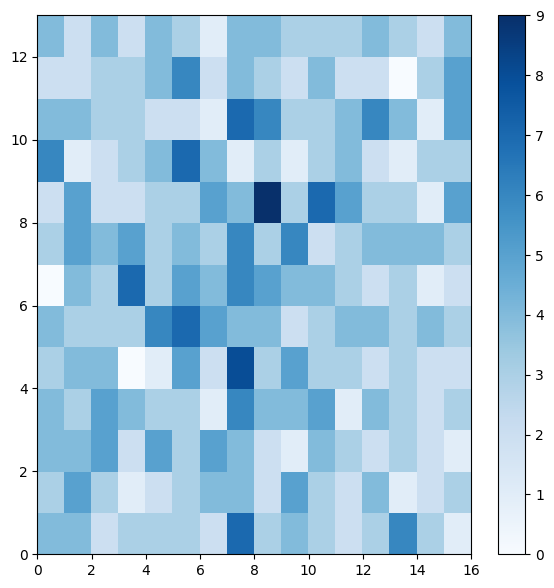

In [ ]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(train_data)
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar()
plt.show()

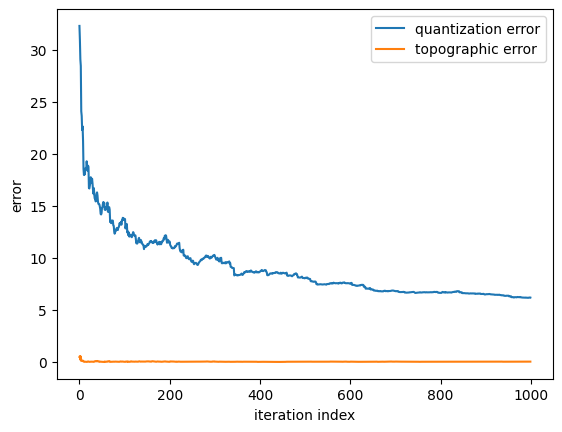

In [ ]:
som = MiniSom(10, 20, train_data.shape[1], sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_data))
    som.update(train_data[rand_i], som.winner(train_data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_data))
    t_error.append(som.topographic_error(train_data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

# Training V2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [ ]:
som = MiniSom(x=16, y=13, input_len= len(train_data[1]), sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(train_data)
som.train_random(data = train_data, num_iteration = 10000)

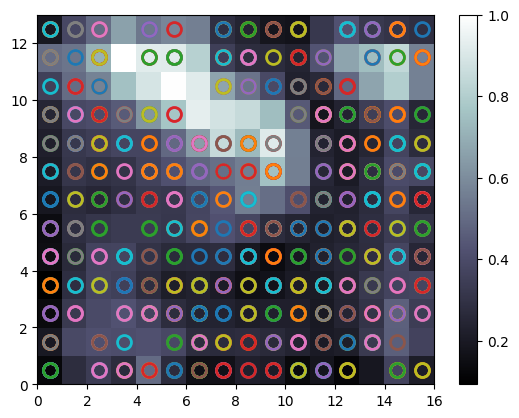

In [ ]:
bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(train_data):
    w = som.winner(x)
    # w[0], w[1] will place the marker at bottom left corner of the rectangle.
    #Let us add 0.5 to both of these to plot the market at the center of the rectange.
    plot(w[0] + 0.5,
         w[1] + 0.5,
         #Target value 0 will have marker "o" with color "r"
         #Target value 1 will have marker "s" with color "g"
         markers[0],
         markerfacecolor = 'None', #No color fill inside markers
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(train_data)
frauds = np.concatenate((mappings[(8,1)], mappings[(3,2)]), axis = 0)

#Training V3 git

In [16]:
import numpy as np
from minisom import MiniSom
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have your training data stored in train_data

# Initialize and train the SOM
n_neurons = 16
m_neurons = 13
som = MiniSom(n_neurons, m_neurons, train_data.shape[1], sigma=1.5, learning_rate=1,
              neighborhood_function='gaussian', random_seed=0, topology='rectangular')

som.pca_weights_init(train_data)
som.train(train_data, 10000, verbose=True)  # random training

/usr/local/lib/python3.10/dist-packages/minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 3.8192276667700416


In [17]:
som.topographic_error(train_data[:850])

0.007142857142857143

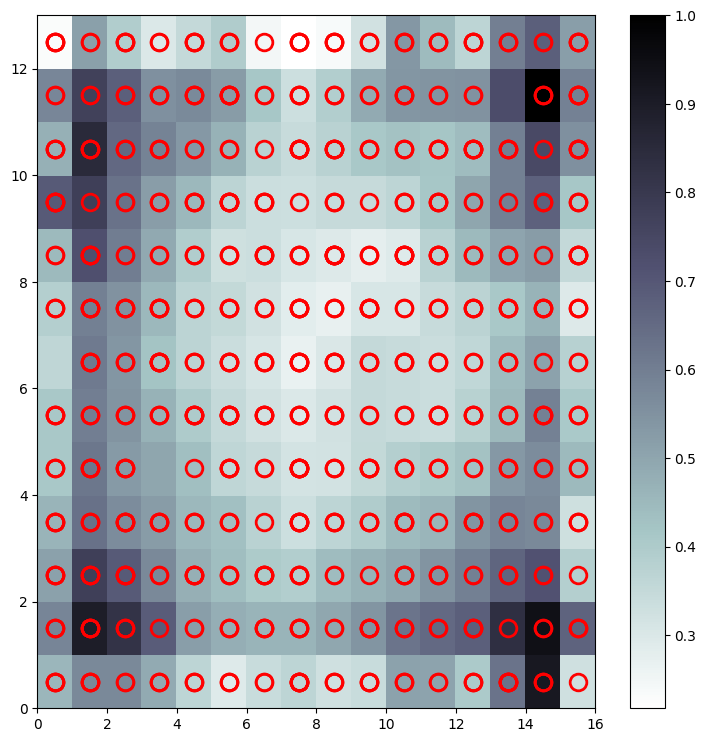

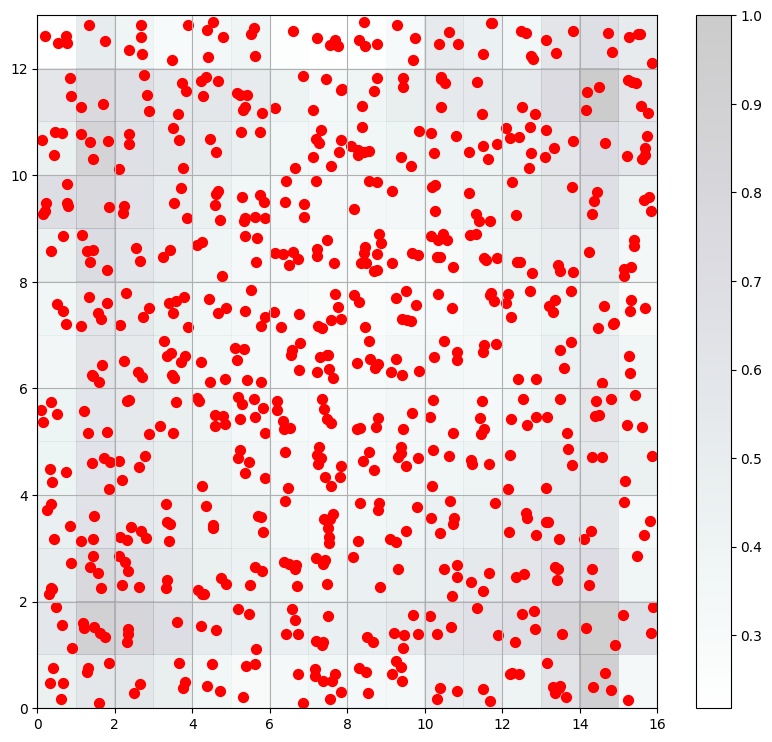

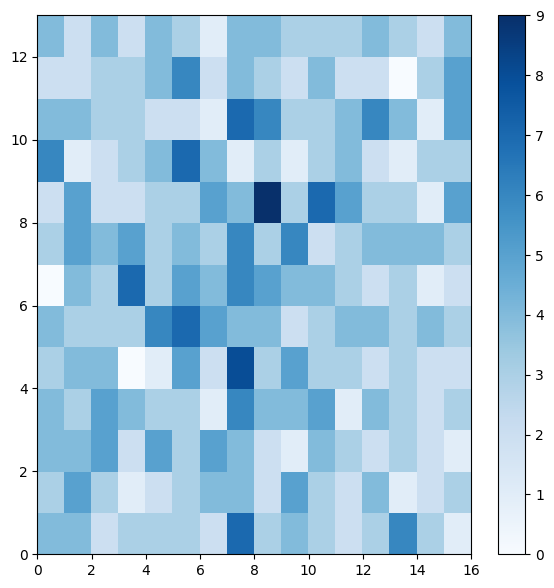

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as background
plt.colorbar()

# Plot the response for each pattern in the dataset
for entry in train_data:
    w = som.winner(entry)  # Get the winner neuron
    # Place a marker on the winning position for the sample entry
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', markeredgecolor='r', markersize=12, markeredgewidth=2)

w_x, w_y = zip(*[som.winner(d) for d in train_data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.show()

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.2)
plt.colorbar()

# Plot the positions of winning neurons based on target labels
for c in range(len(train_data)):
    center = train_data[c][0]  # Anomaly center
    plt.scatter(w_x[c] + 0.5 + (np.random.rand() - 0.5) * 0.8,
                w_y[c] + 0.5 + (np.random.rand() - 0.5) * 0.8,
                s=50, c='r', label=f'Anomaly at {center}')

plt.grid()
plt.show()

plt.figure(figsize=(7, 7))
frequencies = som.activation_response(train_data)
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar()
plt.show()

Mean Squared Error (MSE) between original and reconstructed data: 0.05663141407713044


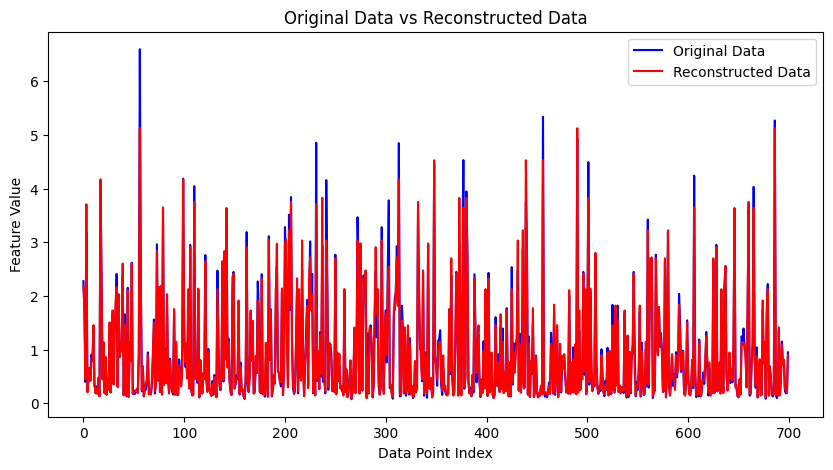

In [19]:
# Get the BMU for each data point after training
bmu_indices = np.array([som.winner(x) for x in train_data])

# Use the weight vectors to reconstruct the data
reconstructed_data = np.array([som._weights[bmu_idx[0], bmu_idx[1]] for bmu_idx in bmu_indices])

# Calculate Mean Squared Error (MSE) between original data and reconstructed data
mse_loss = mean_squared_error(train_data, reconstructed_data)
print("Mean Squared Error (MSE) between original and reconstructed data:", mse_loss)

# Plot the original data against the reconstructed data for visualization
plt.figure(figsize=(10, 5))
plt.plot(train_data[:, 0], label='Original Data', color='blue')
plt.plot(reconstructed_data[:, 0], label='Reconstructed Data', color='red')
plt.xlabel('Data Point Index')
plt.ylabel('Feature Value')
plt.title('Original Data vs Reconstructed Data')
plt.legend()
plt.show()

#Testing v3

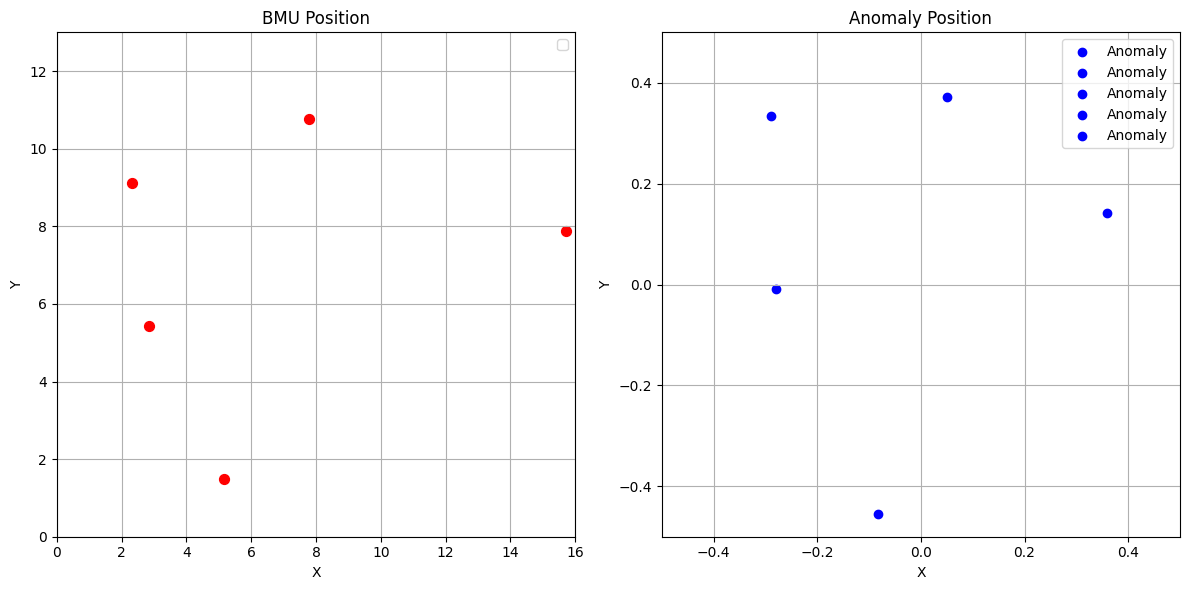

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bmu_and_anomaly(bmu_x, bmu_y, anomaly_position, num_random_points=1):
    # Generate random indices for selecting random points
    random_indices = np.random.choice(len(bmu_x), size=num_random_points, replace=False)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot BMU position
    ax0 = axes[0]
    ax0.set_title("BMU Position")
    for idx in random_indices:
        ax0.scatter(bmu_x[idx] + 0.5 + (np.random.rand() - 0.5) * 0.8,
                    bmu_y[idx] + 0.5 + (np.random.rand() - 0.5) * 0.8,
                    s=50, c='r')
    ax0.set_xlim(0, 16)  # Adjust X-axis limits for BMU scale
    ax0.set_ylim(0, 13)  # Adjust Y-axis limits for BMU scale
    ax0.set_xlabel('X')
    ax0.set_ylabel('Y')
    ax0.grid(True)
    ax0.legend()

    # Plot anomaly position
    ax1 = axes[1]
    ax1.set_title("Anomaly Position")
    for idx in random_indices:
        ax1.scatter(anomaly_position[idx][0], anomaly_position[idx][1], color='b', label='Anomaly')
    ax1.set_xlim(-0.5, 0.5)  # Adjust X-axis limits for anomaly scale
    ax1.set_ylim(-0.5, 0.5)  # Adjust Y-axis limits for anomaly scale
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.grid(True)
    ax1.legend()

    plt.tight_layout()
    plt.show()


plot_bmu_and_anomaly(w_x, w_y, train_centers, num_random_points=5)


# Validation

# Testing

In [23]:
wtest_x, wtest_y = zip(*[som.winner(d) for d in test_data])
wtest_x = np.array(wtest_x)
wtest_y = np.array(wtest_y)

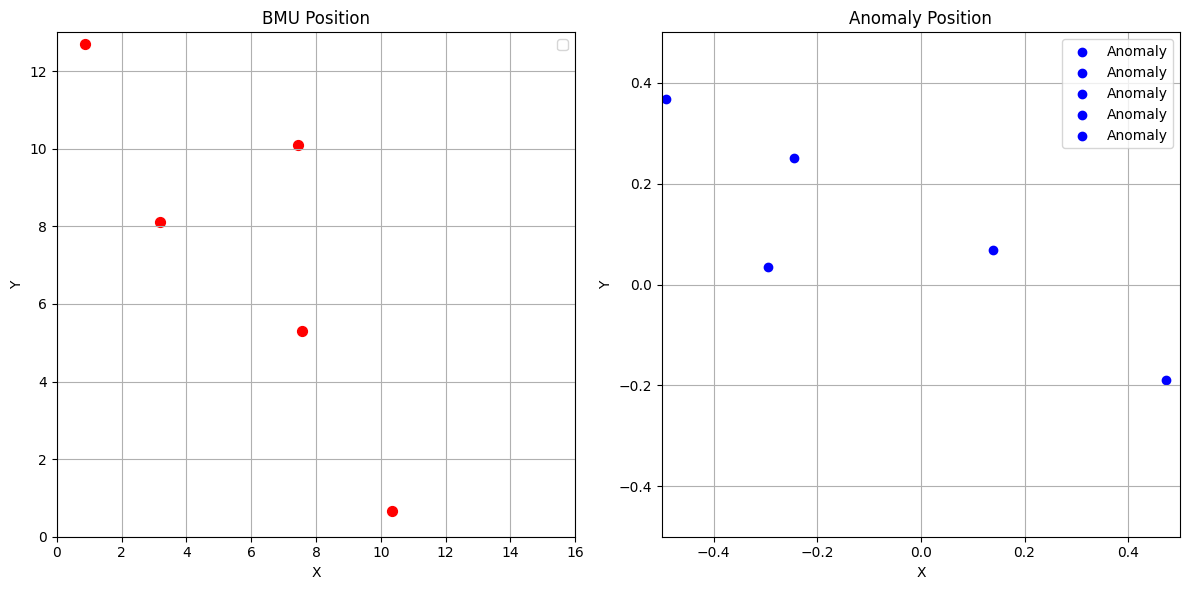

In [24]:
plot_bmu_and_anomaly(wtest_x, wtest_y, test_centers, num_random_points=5)

# Création d'une anomalie

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def create_anomaly_with_input():
    # Define a function to handle the input and visualize the anomaly
    def handle_input(x, y):
        # Convert input to numpy array
        anomaly_center = np.array([x, y])

        # Define fixed anomaly radius and permittivity
        anomaly_radius = 0.1
        anomaly_perm = 10.0

        # Generate the voltage matrix for the anomaly
        anomaly_ds, mesh_obj, mesh_new, pts, tri = generate_voltage_matrix(anomaly_center, anomaly_radius, anomaly_perm)
        display_single_voltage_matrix(anomaly_ds, mesh_obj, mesh_new, pts, tri)
        flattened_anomaly = anomaly_ds.flatten()

        # Find the best matching unit (BMU) for the anomaly
        bmu = som.winner(flattened_anomaly)

        # Visualize the Kohonen grid and mark the activated neuron
        plt.figure(figsize=(10, 9))
        plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
        plt.colorbar()
        plt.scatter(bmu[0] + 0.5, bmu[1] + 0.5, marker='o', color='r', label='BMU')
        plt.legend()
        plt.grid()
        plt.show()

    # Create interactive widgets for input
    x_input = widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=0, description='X:')
    y_input = widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=0, description='Y:')

    # Create interactive output for visualization
    interact(handle_input, x=x_input, y=y_input)

# Call the function to create an anomaly with interactive input and visualize the activated neuron
create_anomaly_with_input()


interactive(children=(FloatSlider(value=0.0, description='X:', max=0.5, min=-0.5, step=0.01), FloatSlider(valu…

interactive(children=(FloatSlider(value=0.0, description='X:', max=0.5, min=-0.5, step=0.01), FloatSlider(valu…

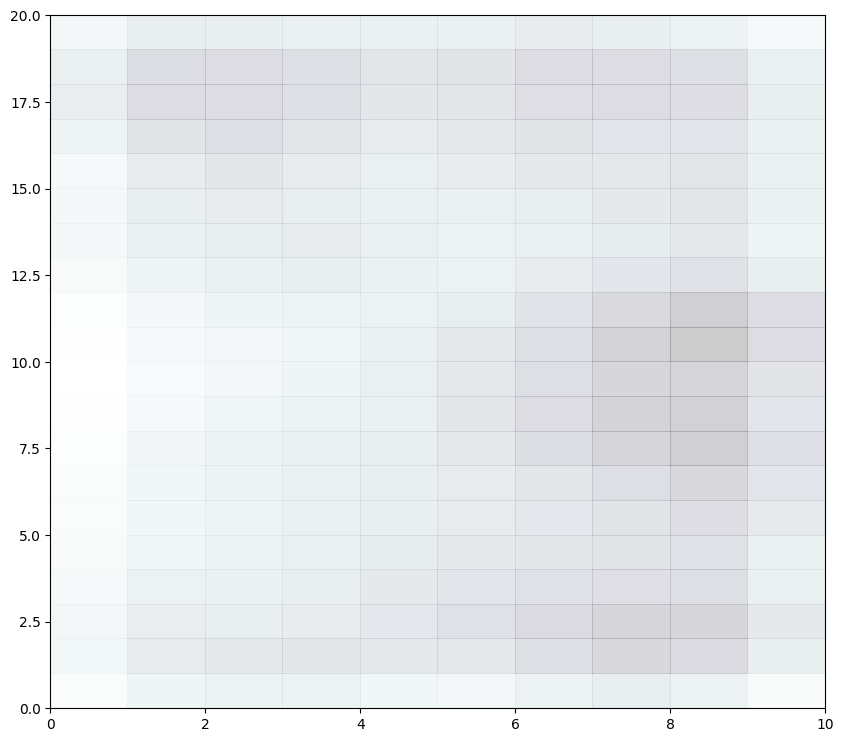

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def create_anomaly_with_input():
    # Define a function to handle the input and visualize the anomaly
    def handle_input(x, y):
        # Convert input to numpy array
        anomaly_center = np.array([x, y])

        # Define fixed anomaly radius and permittivity
        anomaly_radius = 0.1
        anomaly_perm = 10.0

        # Generate the voltage matrix for the anomaly
        anomaly_ds, _, _, _, _ = generate_voltage_matrix(anomaly_center, anomaly_radius, anomaly_perm)
        flattened_anomaly = anomaly_ds.flatten()

        # Find the best matching unit (BMU) for the anomaly
        bmu = som.winner(flattened_anomaly)

        # Visualize the Kohonen grid, neurons, and the activated neuron
        plt.figure(figsize=(10, 9))
        plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)

        # Plot the neurons
        for i in range(som.weights.shape[0]):
            for j in range(som.weights.shape[1]):
                plt.scatter(i + 0.5, j + 0.5, marker='s', color='blue', alpha=0.5)

        plt.colorbar()
        plt.scatter(bmu[0] + 0.5, bmu[1] + 0.5, marker='o', color='r', label='BMU')
        plt.legend()
        plt.grid()
        plt.show()

    # Create interactive widgets for input
    x_input = widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=0, description='X:')
    y_input = widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=0, description='Y:')

    # Create interactive output for visualization
    interact(handle_input, x=x_input, y=y_input)

# Call the function to create an anomaly with interactive input and visualize the activated neuron
create_anomaly_with_input()
